In [1]:
#!pip install geopandas
#!pip install pandas
#!pip install matplotlib


[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd

In [17]:
# set the filepath and load
fp = "Regions.shp"
#reading the file stored in variable fp
map_df = gpd.read_file(fp)

In [18]:
# check data type so we can see that this is not a normal dataframe, but a GEOdataframe
map_df.head()

,ADM1_EN,ADM1_PCODE,ADM_ID,UPDATED,PERIMETER,AREA,LONGITUDE,LATITUDE,geometry
0,Region VII,PH070000000,70000000,2019-12-31,3205930.229,1.429366e+10,123.615,9.921,"MULTIPOLYGON (((123.11764 9.64950, 123.11765 9..."
1,Region VI,PH060000000,60000000,2019-12-31,3033678.117,2.004212e+10,122.651,10.844,"MULTIPOLYGON (((122.36748 9.83003, 122.36750 9..."
2,Bangsamoro Autonomous Region in Muslim Mindanao,PH150000000,150000000,2019-12-31,5932722.500,1.283419e+10,123.367,6.947,"MULTIPOLYGON (((119.46876 4.59360, 119.46881 4..."
3,Cordillera Administrative Region,PH140000000,140000000,2019-12-31,873012.878,1.819264e+10,121.039,17.355,"POLYGON ((121.22208 18.50058, 121.22086 18.483..."
4,National Capital Region,PH130000000,130000000,2019-12-31,253627.782,5.986501e+08,121.032,14.606,"POLYGON ((121.03842 14.78525, 121.03876 14.785..."


In [19]:
# Rename the column "ADM1_EN" to "Region"
map_df.rename(columns={"ADM1_EN": "Region"}, inplace=True)

In [20]:
# Sort values of "Region" in ascending order
map_df.sort_values(by=['Region'], inplace = True)

In [21]:
# Check values of "Region"
map_df['Region'].unique()

array(['Bangsamoro Autonomous Region in Muslim Mindanao',
       'Cordillera Administrative Region', 'National Capital Region',
       'Region I', 'Region II', 'Region III', 'Region IV-A',
       'Region IV-B', 'Region IX', 'Region V', 'Region VI', 'Region VII',
       'Region VIII', 'Region X', 'Region XI', 'Region XII',
       'Region XIII'], dtype=object)

In [22]:
# Replace 'Bangsamoro Autonomous Region in Muslim Mindanao' with 'BARMM'
map_df = map_df.replace({'Region':{'Bangsamoro Autonomous Region in Muslim Mindanao':'BARMM'}})
# Replace 'Cordillera Administrative Region' with 'CAR'
map_df = map_df.replace({'Region':{'Cordillera Administrative Region':'CAR'}})
# Replace 'Cordillera Administrative Region' with 'CAR'
map_df = map_df.replace({'Region':{'National Capital Region':'NCR'}})


In [23]:
# Loading the CSV file into a Pandas DataFrame
data = pd.read_csv('Capstone_Average.csv')

In [24]:
data

,Unnamed: 0,Region,Total Household Income,Monthly Income per Capita,Bread and Cereals Expenditure,Total Rice Expenditure,Meat Expenditure,Total Fish and marine products Expenditure,Fruit Expenditure,Vegetables Expenditure,...,Transportation Expenditure,Communication Expenditure,Education Expenditure,Miscellaneous Goods and Services Expenditure,Special Occasions Expenditure,Crop Farming and Gardening expenses,Total Income from Entrepreneurial Acitivites,Total Number of Family members,House Floor Area,Electricity
0,0,BARMM,134746.82,2197.95,25933.38,20108.13,2255.03,12603.98,2589.91,5303.60,...,4547.07,1271.99,4009.22,6625.89,1256.61,40188.65,79547.60,5.71,49.22,0.54
1,1,CAR,269540.48,5744.20,26666.11,20975.44,12220.99,8357.07,2922.60,6406.84,...,10700.99,3885.42,10560.51,12101.42,5944.18,28428.27,64282.41,4.67,90.92,0.93
2,2,NCR,420861.86,9336.68,24728.88,16195.82,17362.19,11129.34,3577.54,5633.56,...,22546.10,10009.46,12021.56,21965.46,5200.50,451.20,62477.07,4.53,58.08,0.99
3,3,Region I,238110.08,5113.35,22724.91,17439.66,11827.42,8791.24,2133.18,5070.66,...,10244.48,3906.28,5780.37,11736.45,5233.20,13266.89,47923.23,4.56,68.60,0.96
4,4,Region II,236778.22,5309.33,21411.53,16563.45,12307.67,8666.76,1887.81,5550.48,...,8924.35,2832.51,5867.15,10398.46,4293.62,39485.11,71534.28,4.38,58.57,0.95
5,5,Region III,292965.18,6140.40,25187.20,17846.42,15639.87,11289.56,2680.14,5732.41,...,15602.43,5428.20,8486.33,14893.83,5991.85,11281.83,61263.36,4.62,71.12,0.97
6,6,Region IV-A,303360.54,6666.07,24571.53,17260.89,15090.32,10737.16,2938.37,4968.40,...,18396.81,6445.31,10028.40,17305.80,6715.69,3022.15,49382.95,4.45,61.78,0.97
7,7,Region IV-B,216685.12,5029.21,25283.61,20460.67,7919.93,9181.92,2491.86,4575.05,...,8476.44,2523.54,6736.54,10534.42,3954.20,23055.16,70514.19,4.39,48.95,0.86
8,8,Region IX,191000.91,4066.93,24846.29,15047.81,6074.47,10458.00,2092.01,4491.96,...,7222.06,2154.23,4458.27,9668.63,4258.86,14934.77,50011.77,4.55,38.42,0.81
9,9,Region V,186105.49,3938.25,26246.45,19509.34,8509.16,10447.03,3064.72,4821.87,...,7547.36,2387.74,6475.04,9675.01,4610.06,11696.74,40572.59,4.86,45.39,0.88


In [25]:
# Calculate for monthly expenditure per capita
expenditure_total = data.loc[:,['Bread and Cereals Expenditure',
       'Total Rice Expenditure', 'Meat Expenditure',
       'Total Fish and  marine products Expenditure', 'Fruit Expenditure',
       'Vegetables Expenditure', 'Restaurant and hotels Expenditure',
       'Alcoholic Beverages Expenditure', 'Tobacco Expenditure',
       'Clothing, Footwear and Other Wear Expenditure',
       'Housing and water Expenditure',
       'Medical Care Expenditure', 'Transportation Expenditure',
       'Communication Expenditure', 'Education Expenditure',
       'Miscellaneous Goods and Services Expenditure',
       'Special Occasions Expenditure', 'Crop Farming and Gardening expenses']].sum(axis = 1)
expenditure_monthly = (expenditure_total // 12)
expenditure_capita = round(expenditure_monthly / data['Total Number of Family members'], 2)
data.insert(3, 'Total Expenditure', expenditure_total)
data.insert(4, 'Monthly Expenditure per Capita', expenditure_capita)

In [26]:
# drop the columns used in the calculation
data.drop(['Unnamed: 0','Bread and Cereals Expenditure',
       'Total Rice Expenditure', 'Meat Expenditure',
       'Total Fish and  marine products Expenditure', 'Fruit Expenditure',
       'Vegetables Expenditure', 'Restaurant and hotels Expenditure',
       'Alcoholic Beverages Expenditure', 'Tobacco Expenditure',
       'Clothing, Footwear and Other Wear Expenditure',
       'Housing and water Expenditure', 'Imputed House Rental Value',
       'Medical Care Expenditure', 'Transportation Expenditure',
       'Communication Expenditure', 'Education Expenditure',
       'Miscellaneous Goods and Services Expenditure',
       'Special Occasions Expenditure', 'Crop Farming and Gardening expenses'], axis=1, inplace=True)

In [27]:
# Merge the dataframes
map_df = pd.merge(map_df, data, on=['Region'])

In [28]:
map_df

,Region,ADM1_PCODE,ADM_ID,UPDATED,PERIMETER,AREA,LONGITUDE,LATITUDE,geometry,Total Household Income,Total Expenditure,Monthly Expenditure per Capita,Monthly Income per Capita,Total Income from Entrepreneurial Acitivites,Total Number of Family members,House Floor Area,Electricity
0,BARMM,PH150000000,150000000,2019-12-31,5932722.500,1.283419e+10,123.367,6.947,"MULTIPOLYGON (((119.46876 4.59360, 119.46881 4...",134746.82,152992.22,2232.75,2197.95,79547.60,5.71,49.22,0.54
1,CAR,PH140000000,140000000,2019-12-31,873012.878,1.819264e+10,121.039,17.355,"POLYGON ((121.22208 18.50058, 121.22086 18.483...",269540.48,219915.29,3924.20,5744.20,64282.41,4.67,90.92,0.93
2,NCR,PH130000000,130000000,2019-12-31,253627.782,5.986501e+08,121.032,14.606,"POLYGON ((121.03842 14.78525, 121.03876 14.785...",420861.86,304961.03,5609.93,9336.68,62477.07,4.53,58.08,0.99
3,Region I,PH010000000,10000000,2019-12-31,1632853.395,1.230735e+10,120.484,16.907,"MULTIPOLYGON (((119.86596 15.81539, 119.86597 ...",238110.08,182366.01,3332.68,5113.35,47923.23,4.56,68.60,0.96
4,Region II,PH020000000,20000000,2019-12-31,2071974.767,2.638773e+10,121.732,17.207,"MULTIPOLYGON (((122.46667 16.92135, 122.46674 ...",236778.22,191807.06,3649.09,5309.33,71534.28,4.38,58.57,0.95
5,Region III,PH030000000,30000000,2019-12-31,1739247.236,2.130416e+10,120.823,15.392,"MULTIPOLYGON (((120.11687 14.76309, 120.11689 ...",292965.18,225043.10,4059.09,6140.40,61263.36,4.62,71.12,0.97
6,Region IV-A,PH040000000,40000000,2019-12-31,3019032.066,1.584652e+10,121.567,14.162,"MULTIPOLYGON (((122.72165 13.36485, 122.72181 ...",303360.54,235008.43,4400.90,6666.07,49382.95,4.45,61.78,0.97
7,Region IV-B,PH170000000,170000000,2019-12-31,8661995.346,2.679782e+10,119.906,11.359,"MULTIPOLYGON (((117.31260 7.50671, 117.31249 7...",216685.12,172562.07,3275.63,5029.21,70514.19,4.39,48.95,0.86
8,Region IX,PH090000000,90000000,2019-12-31,2560995.195,1.459605e+10,122.848,7.826,"MULTIPOLYGON (((121.88379 6.69138, 121.88380 6...",191000.91,146091.64,2675.60,4066.93,50011.77,4.55,38.42,0.81
9,Region V,PH050000000,50000000,2019-12-31,4917962.098,1.733838e+10,123.472,13.274,"MULTIPOLYGON (((122.98823 11.73079, 122.98824 ...",186105.49,163930.79,2810.70,3938.25,40572.59,4.86,45.39,0.88


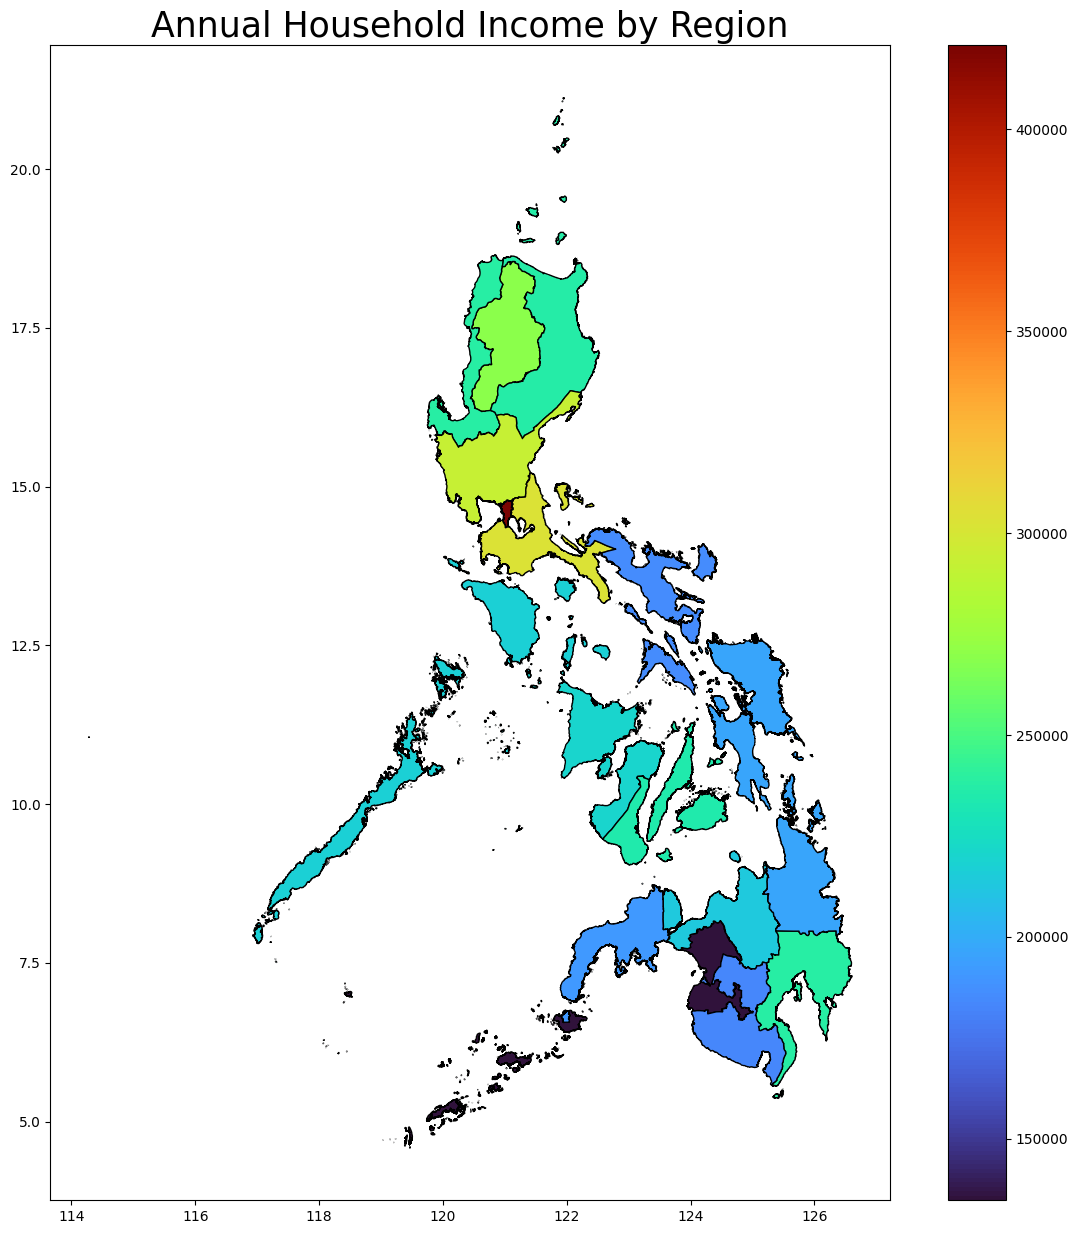

In [29]:
# Annual Income by Region
fig, ax = plt.subplots(figsize=(15,15)) 
map_df.plot(alpha=1.0, cmap ='turbo', column='Total Household Income', edgecolor='black', legend=True, ax=ax) 
ax.set_title('Annual Household Income by Region', fontsize=25)
ax.set_axisbelow(True)
leg = ax.get_legend()
plt.show()

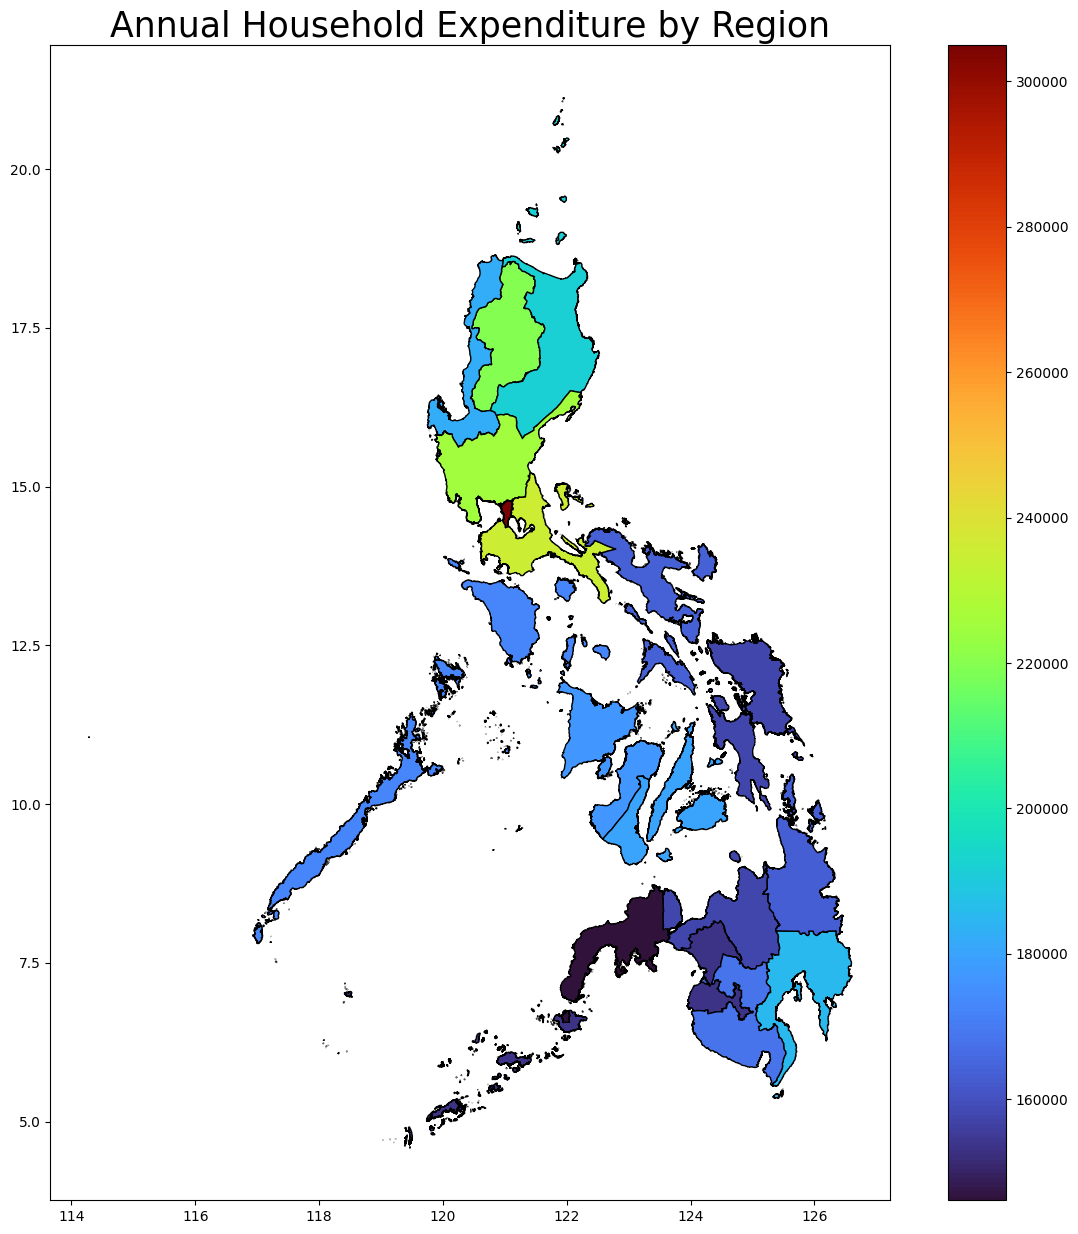

In [30]:
# Annual Expenditure by Region
fig, ax = plt.subplots(figsize=(15,15)) 
map_df.plot(alpha=1.0, cmap ='turbo', column='Total Expenditure', edgecolor='black', legend=True, ax=ax ) 
ax.set_title('Annual Household Expenditure by Region', fontsize=25)
ax.set_axisbelow(True)
leg = ax.get_legend()
plt.show()

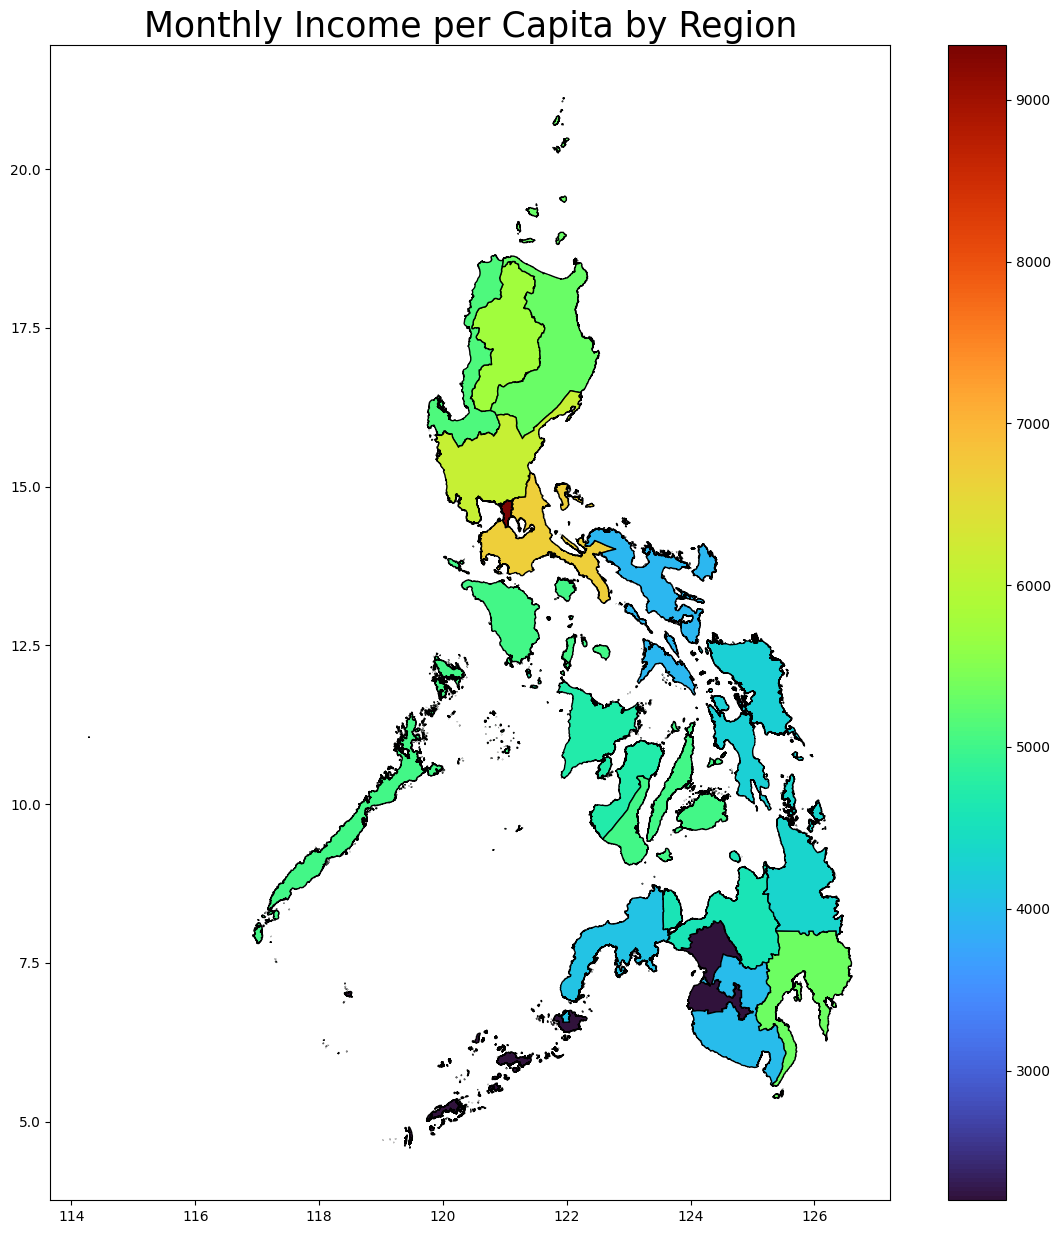

In [31]:
# Monthly Income per Capita by Region
fig, ax = plt.subplots(figsize=(15,15)) 
map_df.plot(alpha=1.0, cmap ='turbo',  column='Monthly Income per Capita', edgecolor='black', legend=True, ax=ax ) 
ax.set_title('Monthly Income per Capita by Region', fontsize=25)
ax.set_axisbelow(True)
leg = ax.get_legend()
plt.show()

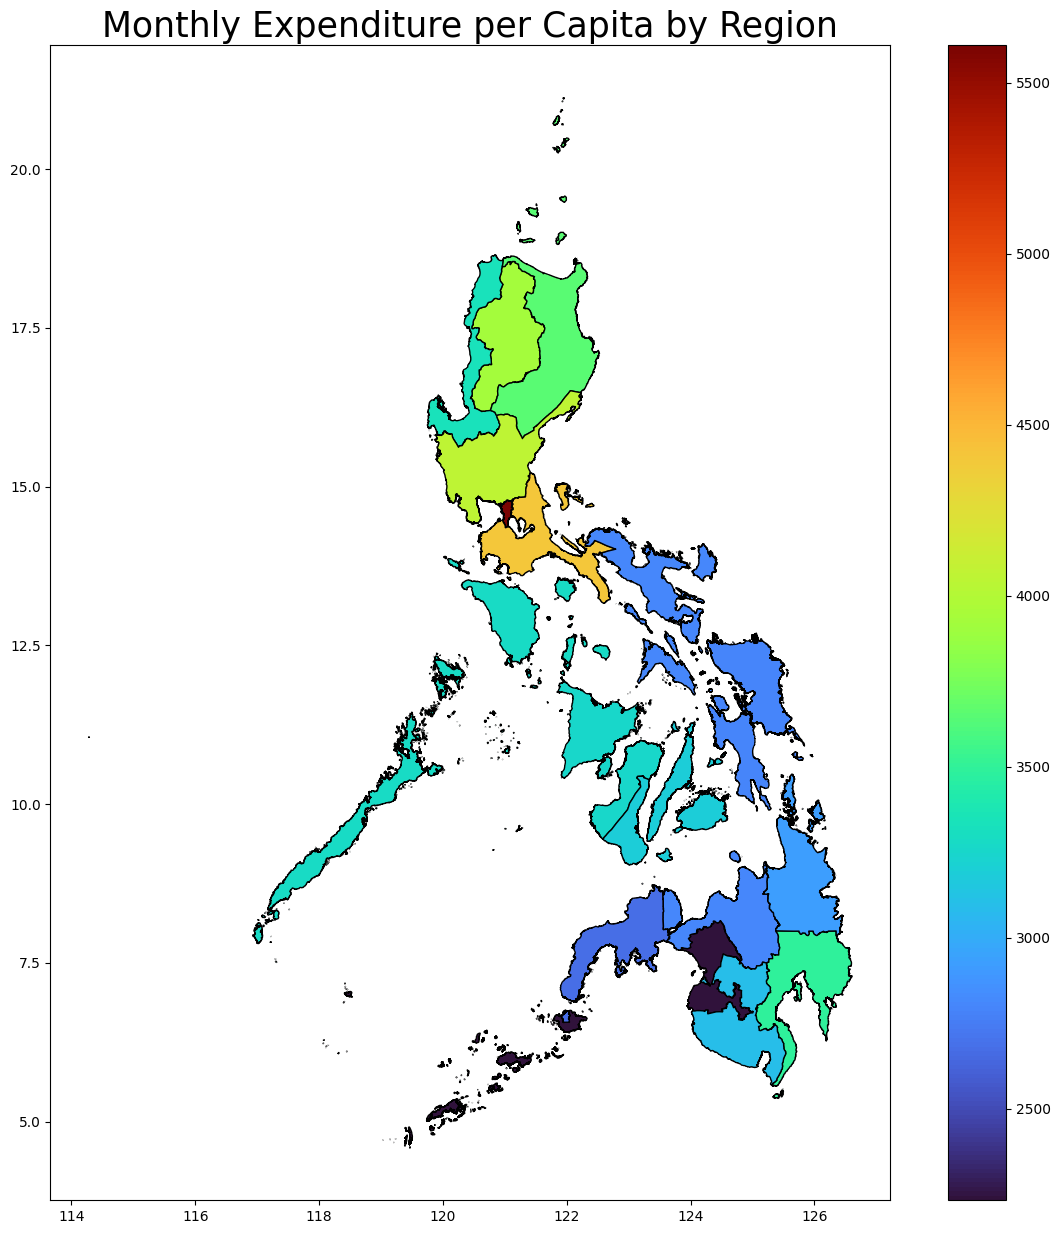

In [32]:
# Monthly Expenditure per Capita by Region
fig, ax = plt.subplots(figsize=(15,15)) 
map_df.plot(alpha=1.0, cmap ='turbo', column='Monthly Expenditure per Capita', edgecolor='black', legend=True, ax=ax ) 
ax.set_title('Monthly Expenditure per Capita by Region', fontsize=25)
ax.set_axisbelow(True)
leg = ax.get_legend()
plt.show()

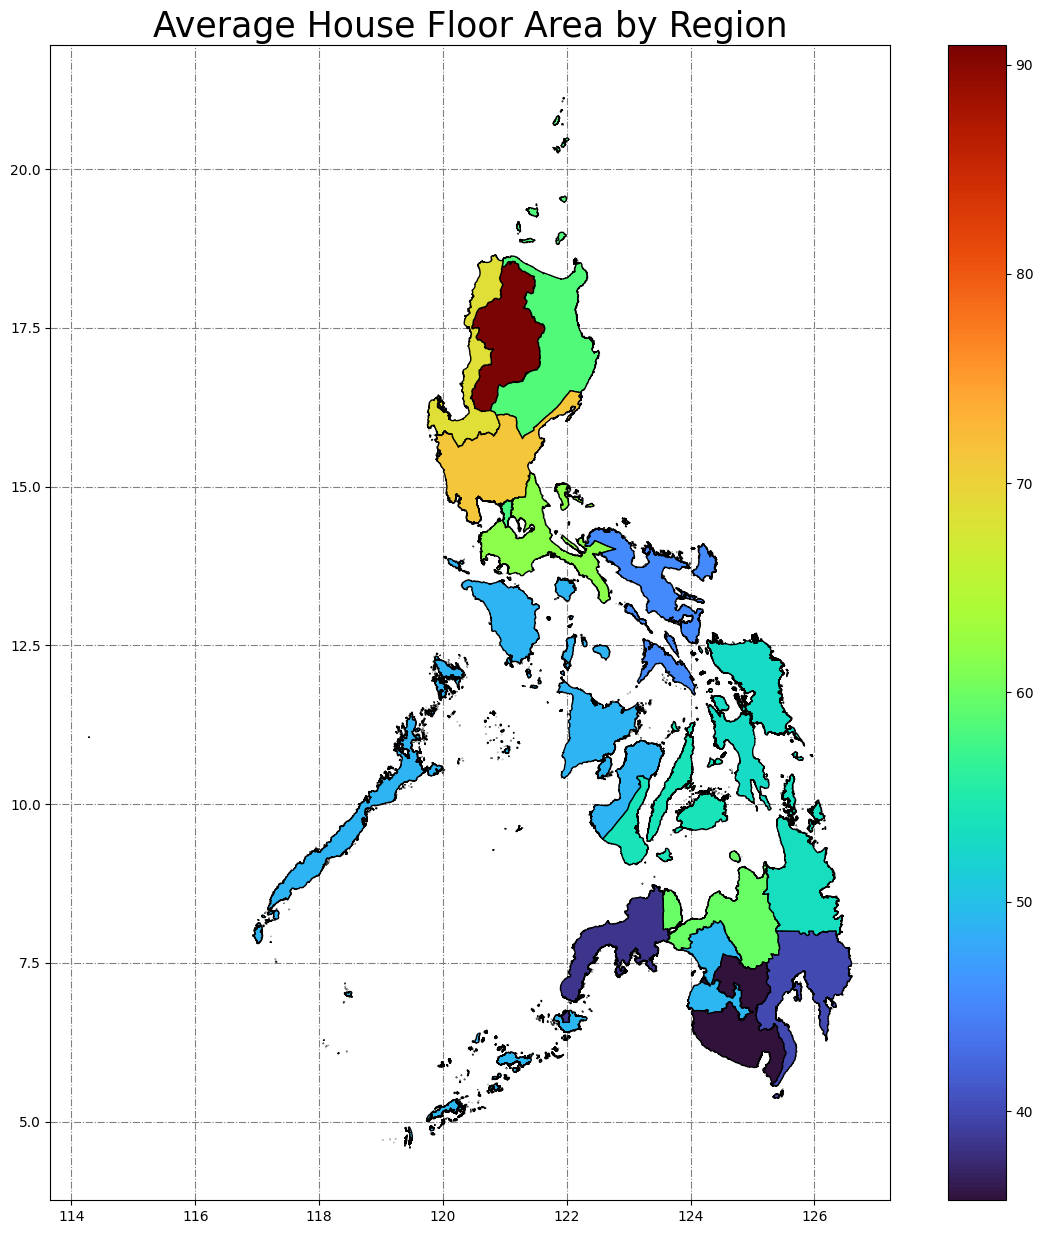

In [33]:
# Average House Floor Area by Region
fig, ax = plt.subplots(figsize=(15,15)) 
map_df.plot(alpha=1.0, cmap ='turbo', column='House Floor Area', edgecolor='black', legend=True, ax=ax ) 
ax.set_title('Average House Floor Area by Region', fontsize=25)
ax.set_axisbelow(True)
ax.yaxis.grid(color='gray', linestyle='dashdot')
ax.xaxis.grid(color='gray', linestyle='dashdot')
leg = ax.get_legend()
plt.show()

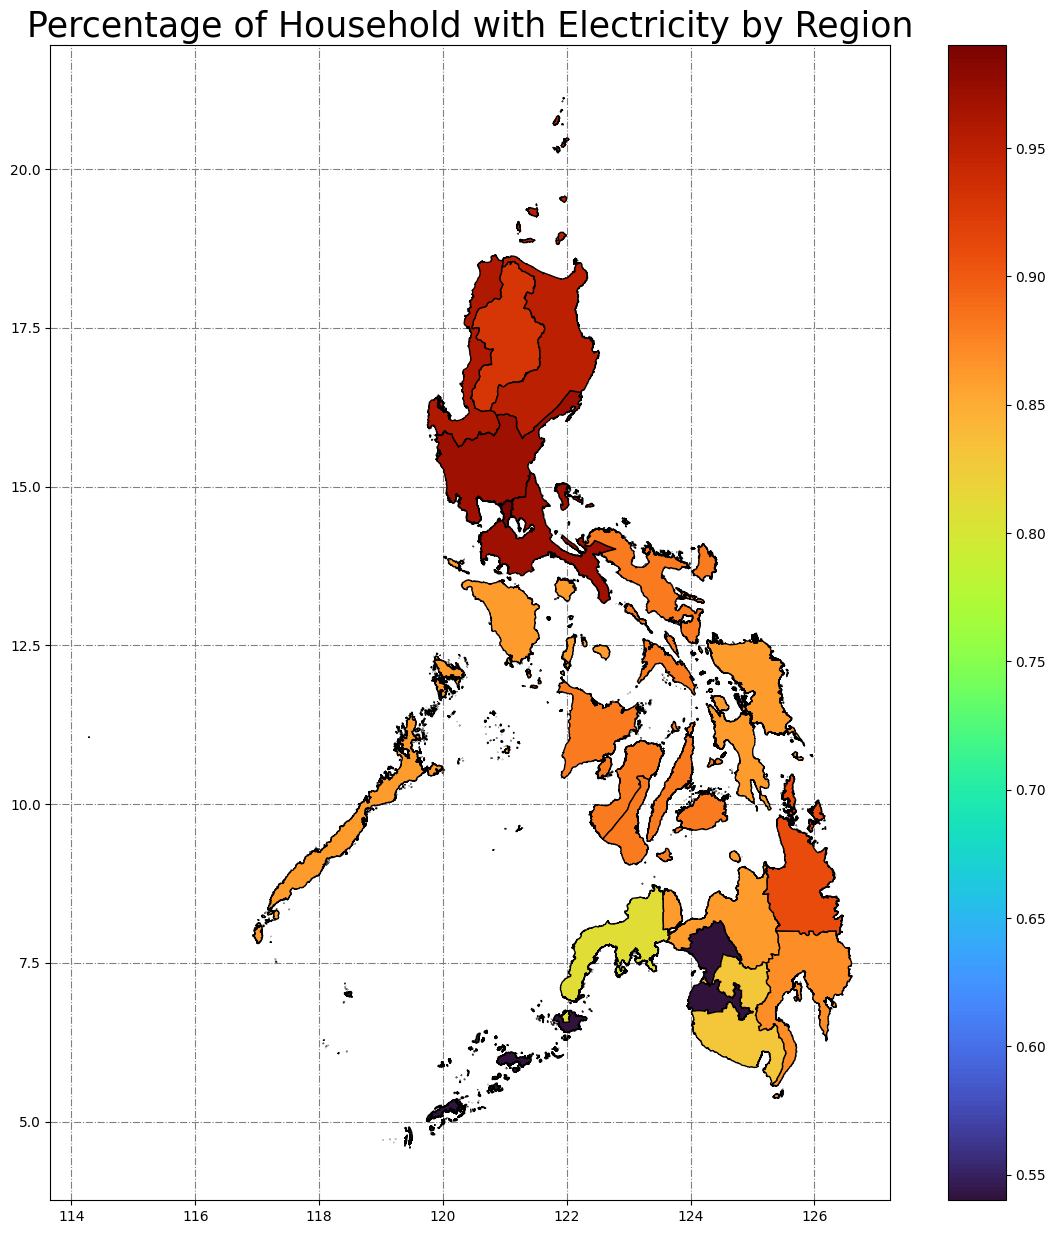

In [34]:
# Percentage of Household with Electricity by Region
fig, ax = plt.subplots(figsize=(15,15)) 
map_df.plot(alpha=1.0, cmap ='turbo', column='Electricity', edgecolor='black', legend=True, ax=ax ) 
ax.set_title('Percentage of Household with Electricity by Region', fontsize=25)
ax.set_axisbelow(True)
ax.yaxis.grid(color='gray', linestyle='dashdot')
ax.xaxis.grid(color='gray', linestyle='dashdot')
leg = ax.get_legend()
plt.show()